In [1067]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### **🛩 Import libraries and dataset**
****

1. Import libraries necessary and dataset

In [1068]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from itertools import combinations 
from scipy import stats 

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier




    1. Write the code that imports the train and test datasets (hint: use pd.read_csv) and assign it to a variables train and test

In [1069]:
train = pd.read_csv("YOUR_DIRECTORY/train.csv")
test = pd.read_csv("YOUR_DIRECTORY/test.csv")

train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


    2. Drop the 2 unecessary columns which are id and unmamed: 0 from the train dataframe

In [1070]:
train.drop(['id', 'Unnamed: 0'], axis = 1, inplace = True)

    3. Create a table the outlines some information on our train data including: Count, unique, frequency, mean, standard deviation etc. (hint: Use the .describe method on the dataframe)

In [1071]:
desc = pd.DataFrame(train.describe(include = 'all').transpose())

desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,103904,2,Female,52727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,103904,2,Loyal Customer,84923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,103904.0,NaN,NaN,NaN,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Type of Travel,103904,2,Business travel,71655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,103904,3,Business,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,103904.0,NaN,NaN,NaN,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,NaN,NaN,NaN,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,NaN,NaN,NaN,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,NaN,NaN,NaN,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,NaN,NaN,NaN,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0


4. Use the summary stats function to view important information such as number of missing values, mean value, max value, data type etc

In [1072]:
def summary_stats(df): 
    print(f'The shape of the data is: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['data type'])
    summary['Number of missing values'] = df.isnull().sum().values 
    summary['% of missing values'] = df.isnull().sum().values / len(df) * 100 
    summary['min value'] = desc['min'].values
    summary['mean value'] = desc['mean'].values
    summary['max value'] = desc['max'].values
    summary['mode value'] = df.mode().values[0]
    summary['Unique values'] = [len(df[x].unique()) for x in df.columns]
    return summary



    4. Use the summary stats function on the train dataframe 

In [1073]:
summary_stats(train)

The shape of the data is: (103904, 23)


,data type,Number of missing values,% of missing values,min value,mean value,max value,mode value,Unique values
Gender,object,0,0.000000,NaN,NaN,NaN,Female,2
Customer Type,object,0,0.000000,NaN,NaN,NaN,Loyal Customer,2
Age,int64,0,0.000000,7.0,39.379706,85.0,39,75
Type of Travel,object,0,0.000000,NaN,NaN,NaN,Business travel,2
Class,object,0,0.000000,NaN,NaN,NaN,Business,3
Flight Distance,int64,0,0.000000,31.0,1189.448375,4983.0,337,3802
Inflight wifi service,int64,0,0.000000,0.0,2.729683,5.0,3,6
Departure/Arrival time convenient,int64,0,0.000000,0.0,3.060296,5.0,4,6
Ease of Online booking,int64,0,0.000000,0.0,2.756901,5.0,3,6
Gate location,int64,0,0.000000,0.0,2.976883,5.0,3,6


#### **Dealing with missing values**
****


    1. Fill in the gaps

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">The variable "Arrival Delay in Minutes" has 310 missing values. We can perform mean imputation to replace the missing values with the average value in this column. 
</div>

5. After identifying which columns have missing values we fill in the missing values with the mean

    2. Find the mean of the column with the missing values and assign it to a variable called mean_arrival_delay

In [1074]:
mean_arrival_delay = train["Arrival Delay in Minutes"].mean()

In [1075]:
print(f'The average arrival delay duration in minutes is ', round(mean_arrival_delay,2))

The average arrival delay duration in minutes is  15.18


    3. fill the missing values in the column "Arrival Delay in Minutes" with the mean (hint: Use the .fillna() method)

In [1076]:
train['Arrival Delay in Minutes'].fillna(mean_arrival_delay, inplace = True)

6. Look at those variables that are most corrleated with whether someone is satisfied or not

    1. Gather a list of the categories that are numerical (int64 or float64) and those that are categorical (object)

In [1077]:
numeric_columns = train.select_dtypes(include='number')
categorical_columns = train.select_dtypes(exclude='number')

    2. make a copy of our train dataset using train.copy() and assign it to a variable called train_display

In [1078]:
train_display = train.copy()

    3. Label encode the categorical columns 
        a. To do this assign the object LabelEncoder() to the variable le

In [1079]:
le = LabelEncoder()

        b. use a for loop to re-assign each categorical column train_display[col] to its label encoded version

In [1080]:
for col in categorical_columns.columns:
     train_display[col] = le.fit_transform(train[col])



In [1081]:
train_display.corr().loc['satisfaction'].abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.503557
Class                                0.449321
Type of Travel                       0.449000
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Customer Type                        0.187638
Ease of Online booking               0.171705
Age                                  0.137167
Arrival Delay in Minutes             0.057497
Departure/Arrival time convenient    0.051601
Departure Delay in Minutes           0.050494
Gender                            

#### **🛩 Exploratory data analysis**
****

7. Create some count plots of non-numerical categorical columns to view how many of each unique valeue that there is? (q: what insights can we get from this?)

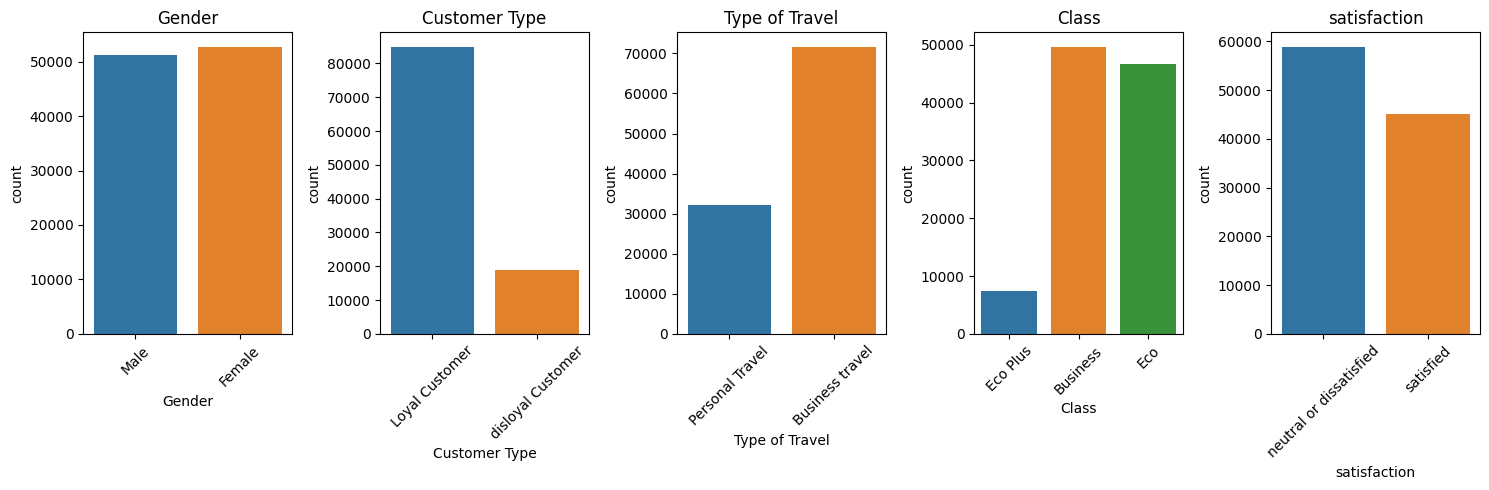

In [1082]:
numeric_train = train.select_dtypes(['float', 'int'])
categorical_train = train.select_dtypes(['object'])

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, column in enumerate(categorical_train.columns):
    ax = axes[i]
    sns.countplot(data=categorical_train, x=column, ax=ax)
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=45)

    
plt.tight_layout()
plt.show()

    1. Fill in the blanks below

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
- There is an equal number of male and female participants in the survey. </br>
- Most customers on this airline are business travel customers and most of them purchase tickets for Business class, followed by Eco class. </br>
- A large proportion of customers felt neutral or dissatisfied with the airline.
</div>

8. Create some count plots of numerical categorical columns to view how many of each unique valeue that there is? (q: what insights can we get from this?)

    1. Create a list of all of the columns that are numerical but have only a few unique values, you can do this by running 'train[col].unique()' for all columns where 'col' is the column name

In [1083]:
categoric = [
              "Cleanliness", "Inflight service",  "Checkin service", 
             "Baggage handling", "Leg room service", 
             "On-board service", "Inflight entertainment", "Seat comfort", "Online boarding", 
             "Food and drink", "Gate location", "Ease of Online booking", "Departure/Arrival time convenient",
             "Inflight wifi service"
             ]


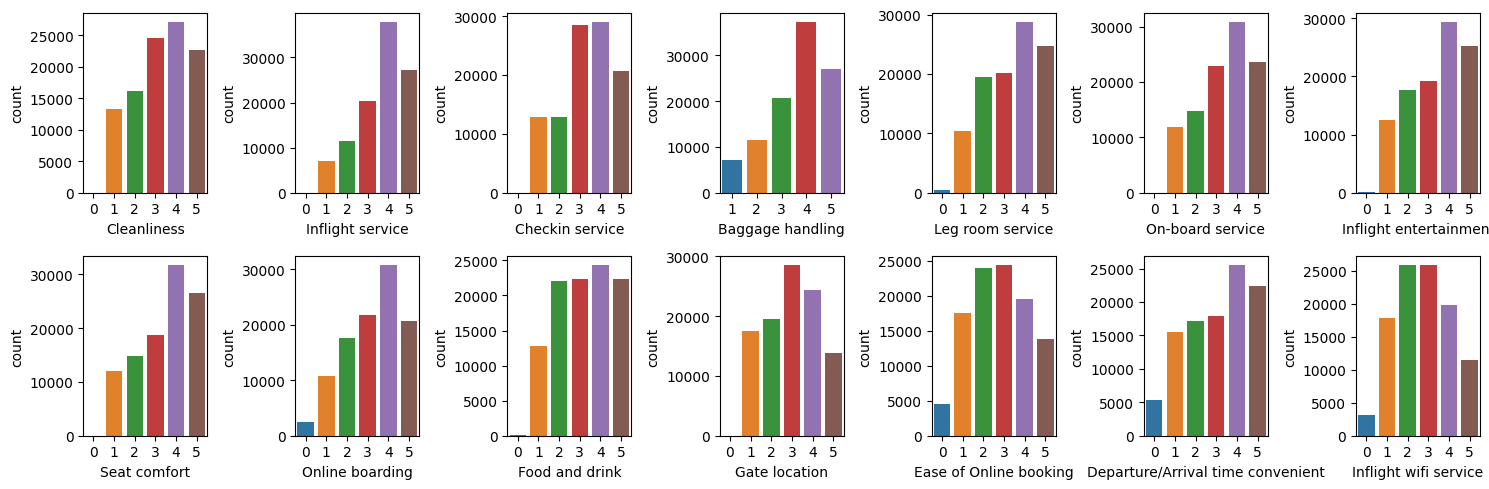

In [1084]:
fig, axes = plt.subplots(2, 7, figsize=(15, 5))
for i, column in enumerate(categoric):
    row = i // 7
    col = i % 7
    
    ax = axes[row, col]
    sns.countplot(data=train, x=column, ax=ax)
    
plt.tight_layout()
plt.show()

9. Create some Kernel density plots for view the distribution of continuous variables

    1. Find the numerical columns that are continuous, you can do this by running 'train[col].unique()' for all columns where 'col' is the column name

In [1085]:
numeric = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]


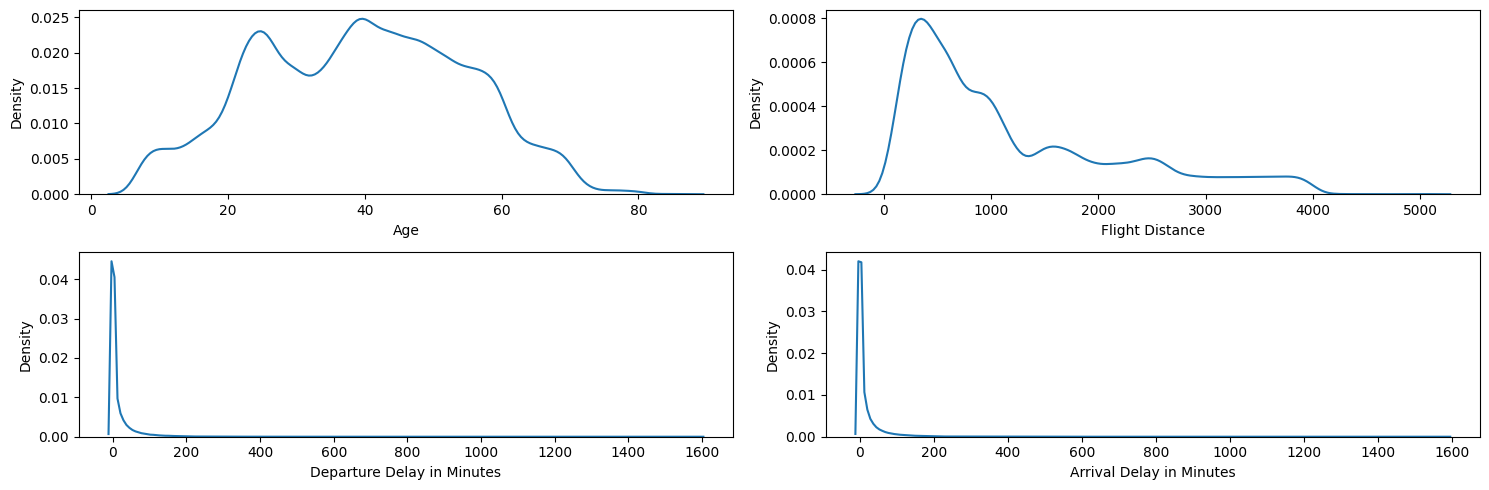

In [1086]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for i, column in enumerate(numeric):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    sns.kdeplot(data=train, x=column, ax=ax)

plt.tight_layout()
plt.show()

    2. Fill in the gaps

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
The variables "Flight Distance", "Departure Delay in Minutes" and "Arrival Delay in Minutes" are all heavily right-skewed. 
</div>

#### **🛩 Statistical analysis (Chi-square test)**
****


In [1087]:
categoric = [
              "Gender", "Customer Type", "Type of Travel", "Class", "satisfaction", "Cleanliness", "Inflight service",  "Checkin service", 
             "Baggage handling", "Leg room service", 
             "On-board service", "Inflight entertainment", "Seat comfort", "Online boarding", 
             "Food and drink", "Gate location", "Ease of Online booking", "Departure/Arrival time convenient",
             "Inflight wifi service"
             ]


    1. Convert all categorical variables in the dataframe categorical_train into a categorical data type (hint: use the .astype("category") method to do this)

In [1088]:
categorical_train[categoric] = train[categoric].astype("category")


In [1089]:
categorical_train.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Cleanliness,Inflight service,Checkin service,Baggage handling,Leg room service,On-board service,Inflight entertainment,Seat comfort,Online boarding,Food and drink,Gate location,Ease of Online booking,Departure/Arrival time convenient,Inflight wifi service
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,5,5,4,4,3,4,5,5,3,5,1,3,4,3
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,1,4,1,3,5,1,1,1,3,1,3,3,2,3
2,Female,Loyal Customer,Business travel,Business,satisfied,5,4,4,4,3,4,5,5,5,5,2,2,2,2
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,2,4,1,3,5,2,2,2,2,2,5,5,5,2
4,Male,Loyal Customer,Business travel,Business,satisfied,3,3,3,4,4,3,3,5,5,4,3,3,3,3


<div>The code is performing a chi-squared test of independence between pairs of categorical variables in the `categorical_train` DataFrame. It iterates over all combinations of two columns, constructs a contingency table, performs the chi-squared test, and if the resulting p-value is greater than 0.05 (indicating no significant association), it adds the second variable of the pair (`i[1]`) to the `not_significant` list. This process helps identify pairs of variables that are not statistically significant or independent.
</div>

For more info on Chi-squared as a test for significance see the following link: https://www.jmp.com/en_gb/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html

    2. Create an empty list and assign it to a variable called not_significant, we will add all the names of the columns which we will eventually remove to this list

In [1090]:
not_significant = []

In [1091]:
combi = list(combinations(categorical_train.columns, 2))

for i in combi:
    table = pd.crosstab(categorical_train[i[0]], categorical_train[i[1]])
    chi2_statistic, p, _, _ = stats.chi2_contingency(table, correction=False)
    if p > 0.05:
        not_significant.append(i[1])

print(f"The variables that have a p-value of greater than 0.05 and thus not significant in prediction of satisfaction are ", not_significant)

The variables that have a p-value of greater than 0.05 and thus not significant in prediction of satisfaction are  ['Inflight entertainment', 'Gate location', 'Ease of Online booking']


#### 🛩 **Statistical analysis (Correlation)**
****

10. Looking to see the correlation between any of the numerical catgories, here we are creating a pandas dataframe of the numerical categories and the target variable

In [1092]:
train['satisfaction'] = le.fit_transform(train['satisfaction'])

    1. Show the column of the continuous numerical columns from the within the train dataframe, and also include our target variable (hint: train[]) as assign it to a variable called numerical_df

In [1093]:
numeric_df = train[["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "satisfaction"]]

In [1094]:
numeric_df.head(10)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,13,460,25,18.0,0
1,25,235,1,6.0,0
2,26,1142,0,0.0,1
3,25,562,11,9.0,0
4,61,214,0,0.0,1
5,26,1180,0,0.0,0
6,47,1276,9,23.0,0
7,52,2035,4,0.0,1
8,41,853,0,0.0,0
9,20,1061,0,0.0,0


11. Drawing out a correlation matrix between the numerical variable to test for multicollinearity

    1. Use the .corr() method to derive a correlation matrix of our numercial dataframe

In [1095]:
numeric_df.corr()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Age,1.000000,0.099461,-0.010152,-0.012127,0.137167
Flight Distance,0.099461,1.000000,0.002158,-0.002423,0.298780
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.961161,-0.050494
Arrival Delay in Minutes,-0.012127,-0.002423,0.961161,1.000000,-0.057497
satisfaction,0.137167,0.298780,-0.050494,-0.057497,1.000000


    2. Use the sns.heatmap() method to create a graphical heatmap of the correlation matrix (help: set the parameter 'annot' equal to true)

<Axes: >

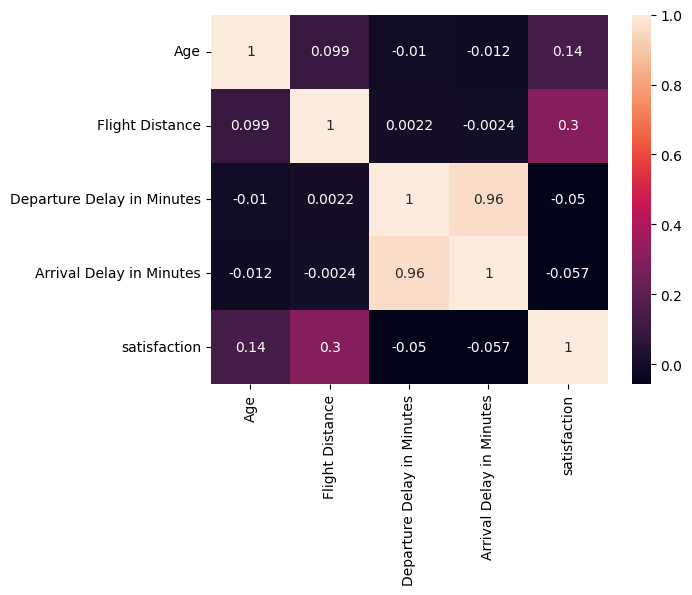

In [1096]:
sns.heatmap(numeric_df.corr(), annot=True)

    3. Fill in the gaps

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
"Depature Delay in Minutes" has a large correlation with "Arrival Delay in Minutes" (Correlation = 0.96). We can remove one of the columns from the dataset. We remove "Arrival Delay in Minutes".
</div>

12. After seeing that there is a large correlation between Arrival delay in minutes and departure delay, we have to drop one of them

    4. Lets add the column 'Arrival Delay in Minutes' to the not significant list using the .append() method

In [1097]:
not_significant.append("Arrival Delay in Minutes")

In [1098]:
print(f"The variables that are not significant in prediction of satisfaction are ", not_significant)

The variables that are not significant in prediction of satisfaction are  ['Inflight entertainment', 'Gate location', 'Ease of Online booking', 'Arrival Delay in Minutes']


#### **🛩 Machine learning preparation**
****

    1. Now drop all of the non-significant columns from the train df using the .drop() method and assign the new dataframe called clean_train (hint: the .drop() method takes in a parameter called axis that specifies whether the drop is referenceing the columns or the rows)

In [1099]:
clean_train = train.drop(not_significant, axis = 1)

In [1100]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer Type                      103904 non-null  object
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  object
 4   Class                              103904 non-null  object
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Food and drink                     103904 non-null  int64 
 9   Online boarding                    103904 non-null  int64 
 10  Seat comfort                       103904 non-null  int64 
 11  On-board service                   103904 non-null  

/Users/rayanbessadi/Documents/Code/Data science/Data science/Satisfaction/datascience/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


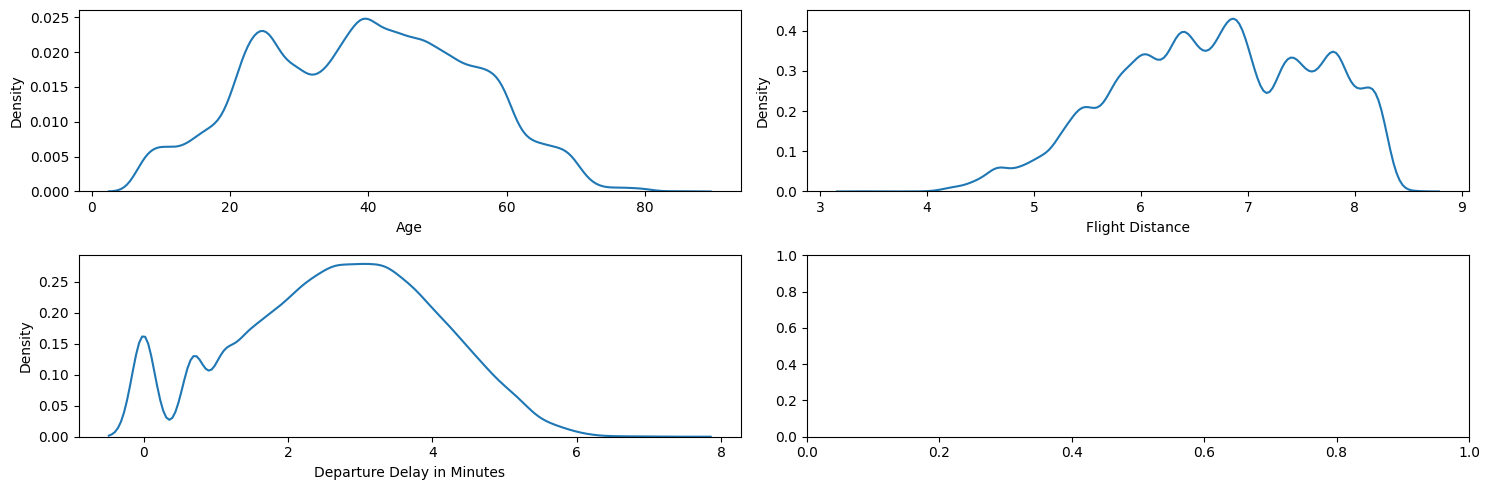

In [1101]:
clean_train["Flight Distance"] = np.log(clean_train["Flight Distance"])
clean_train["Departure Delay in Minutes"] = np.log(clean_train["Departure Delay in Minutes"])

numeric = ["Age", "Flight Distance", "Departure Delay in Minutes"]

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for i, column in enumerate(numeric):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    sns.kdeplot(data= clean_train, x=column, ax=ax)
    
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
Although "Departure Delay in Minutes" is still very right skewed, "Fight Distance" is now more normally distribured. 
</div>

In [1102]:
clean_train.head() 

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,6.131226,3,4,5,3,5,4,3,4,4,5,5,3.218876,0
1,Male,disloyal Customer,25,Business travel,Business,5.459586,3,2,1,3,1,1,5,3,1,4,1,0.000000,0
2,Female,Loyal Customer,26,Business travel,Business,7.040536,2,2,5,5,5,4,3,4,4,4,5,-inf,1
3,Female,Loyal Customer,25,Business travel,Business,6.331502,2,5,2,2,2,2,5,3,1,4,2,2.397895,0
4,Male,Loyal Customer,61,Business travel,Business,5.365976,3,3,4,5,5,3,4,4,3,3,3,-inf,1


In [1103]:
X = clean_train.drop(["satisfaction"], axis = 1)
y = clean_train["satisfaction"]

13. We next need to normalize the numeric variables, this is the process of transforming the variables to a common scale or range to ensure a fair comparison between variables and prevent one variable from dominating others due to its larger magnitude, we will normalize using the standard scalar object

In [1104]:
scaler = StandardScaler()
numeric_col = ["Age", "Flight Distance", "Departure Delay in Minutes"]

Here we replace infinite values as well as extremely large valeus with the mean.

In [1105]:
for numeric_val in numeric_col:
    X[numeric_val] = X[numeric_val].replace([np.inf, -np.inf], np.nan)
    X[numeric_val] = X[numeric_val].clip(lower=-1e6, upper=1e6)  # Replace extremely large values with a suitable range
    X[numeric_val].fillna(X[numeric_val].mean(), inplace=True) 


In [1106]:
X[numeric_col] = scaler.fit_transform(X[numeric_col])

14. We now want to turn the categorical columns into a machine readable format so it can be interpretted by our model, we do this using the Label encoder object

In [1107]:
le = LabelEncoder()
cat_col = ["Gender", "Type of Travel", "Class", "Customer Type"]

for cols in cat_col: 
    X[cols] = le.fit_transform(X[cols])

X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,1,0,-1.745279,1,2,-0.624110,3,4,5,3,5,4,3,4,4,5,5,0.571006
1,1,1,-0.951360,0,0,-1.356305,3,2,1,3,1,1,5,3,1,4,1,-3.004268
2,0,0,-0.885200,0,0,0.367182,2,2,5,5,5,4,3,4,4,4,5,0.000000
3,0,0,-0.951360,0,0,-0.405778,2,5,2,2,2,2,5,3,1,4,2,-0.340875
4,1,0,1.430397,0,0,-1.458354,3,3,4,5,5,3,4,4,3,3,3,0.000000


15. We also want to do the same thing to our target variable

In [1108]:
le = LabelEncoder()
y = le.fit_transform(y)

In [1109]:
y

array([0, 0, 1, ..., 0, 0, 0])

16. We are then splitting our training dataset into train and a test datasets, this will allow us to evaluate which model is best for predicting, we also cannot use the actual test dataset becuase this results in data leakage, data leakage occurs when information from the testing set is inadvertently used during model training. This can lead to overly optimistic performance estimates

In [1110]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print(f"X_train shape: ", X_train.shape)
print(f"X_val shape: ", X_val.shape)

X_train shape:  (83123, 18)
X_val shape:  (20781, 18)


#### **🛩 Modelling**
****

17. Here we create a function that calculates key metrics used to measure the effectiveness of a model

In [1111]:
def mod (model):
    accuracy = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(accuracy_score))).mean()
    F1 = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(f1_score))).mean()
    precision = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(precision_score))).mean()
    recall = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(recall_score))).mean()
    auc = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(roc_auc_score))).mean()
    
    return (accuracy, F1, precision, recall, auc)

18. We test out 5 different machine learning algorithm and compare which of the 5 has the best performance for predicting our test values

In [1112]:
models = []

models.append(('Logistic_Reg', LogisticRegression()))
models.append(('Decision_Tree', DecisionTreeClassifier()))
models.append(('Random_Forest', RandomForestClassifier()))
models.append(('XGBoost', XGBClassifier()))

models

[('Logistic_Reg', LogisticRegression()),
 ('Decision_Tree', DecisionTreeClassifier()),
 ('Random_Forest', RandomForestClassifier()),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...))]

In [1113]:
model_name = []
model_metrics = []

for i in models: 
    model_name.append(i[0])
    model_metrics.append(mod(i[1]))

final = pd.DataFrame(model_metrics, 
                    columns = ['Accuracy', 'F1', 'Precision', 'Recall', 'AUC'], 
                    index = model_name)

final

    1. Fill in the gaps

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
XGboost is the best performing model in all metrics that we used apart from precision
</div>

19. After deciding that the XGboost machine algorithm has the best performance, we decide to use this one

    2. Create an instance of XGBClassifier and assign it to a variable called xgb

In [1114]:
xgb = XGBClassifier()

    3. Use the .fit() method to train the model xgb on the train data(X_train and y_train) 

In [1115]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

    4. Use the .predict() method to predict the values of X_val and assign the predictions to the variable y_pred

In [1116]:
y_pred = xgb.predict(X_val)

This is comparing the predictions with the actual of the validation data

In [1117]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

auc_score = roc_auc_score(y_val, y_pred)
print("AUC Score:", auc_score)

Accuracy: 0.9628988017900967
AUC Score: 0.9608879775803901


#### **🛩 Test prediction**
****

20. we now all of our necessary changes to the test dataset that we had previously done to the train dataset as follows:




    1.Drop the column unnamed: 0 (we dont drop id because we need it for our final submission document)

In [1118]:
test.drop(['Unnamed: 0'], axis = 1, inplace = True)

test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


    2. Drop all of the columns that are not significant (hint: remember the list of non-significant columns that we collected earlier)

In [1119]:
clean_test = test.drop(not_significant, axis = 1)
clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   id                                 25976 non-null  int64 
 1   Gender                             25976 non-null  object
 2   Customer Type                      25976 non-null  object
 3   Age                                25976 non-null  int64 
 4   Type of Travel                     25976 non-null  object
 5   Class                              25976 non-null  object
 6   Flight Distance                    25976 non-null  int64 
 7   Inflight wifi service              25976 non-null  int64 
 8   Departure/Arrival time convenient  25976 non-null  int64 
 9   Food and drink                     25976 non-null  int64 
 10  Online boarding                    25976 non-null  int64 
 11  Seat comfort                       25976 non-null  int64 
 12  On-b

**c.** Taking the natural logarithm of the numerical variables that are skewed, this is done to make it more suitable for model predicting and reduce skewedness

    3. Take the natural logarithm of Flight Distance and Departure Delay in Minutes using np.log and re-assign the columns in the clean_test dataframe with these new arrays

In [1120]:
clean_test["Flight Distance"] = np.log(clean_test["Flight Distance"])
clean_test["Departure Delay in Minutes"] = np.log(clean_test["Departure Delay in Minutes"])

/Users/rayanbessadi/Documents/Code/Data science/Data science/Satisfaction/datascience/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


    4. Define the columns for our x and y

In [1121]:
X = clean_test.drop(['id',"satisfaction"], axis = 1)
y = clean_test["satisfaction"]

**e.** We now scale the numerical variables

    5. Create an instance of the StandardScaler() object and assign it to a variable called scaler

In [1122]:
scaler = StandardScaler()

    6. make a list of the numerical continuous columns and assign the list of names to a variables called numeric_col 

In [1123]:
numeric_col = ["Age", "Flight Distance", "Departure Delay in Minutes"]

Here we replace infinite values as well as extremely large valeus with the mean.

In [1124]:
# Handle the problematic values in X
for numeric_val in numeric_col:
    X[numeric_val] = X[numeric_val].replace([np.inf, -np.inf], np.nan)
    X[numeric_val] = X[numeric_val].clip(lower=-1e6, upper=1e6)  # Replace extremely large values with a suitable range
    X[numeric_val].fillna(X[numeric_val].mean(), inplace=True) 

    7. Use the method .fit_transform() to transform the values in the columns and assign them as the new values in the dataframe X

In [1125]:
X[numeric_col] = scaler.fit_transform(X[numeric_col])

**f.** We now encode our categorical variables

    8. Create an instance of LabelEncoder() and assign it to a variable named le

In [1126]:
le = LabelEncoder()

    9. Make a list of the categorical columns and assign the list of names to a variable called cat_col

In [1127]:
cat_col = ["Gender", "Customer Type", "Type of Travel", "Class"]

    10.Use a for loop to re-assign each categorical column X[cols] to its label encoded version by using le.fit_transform(X[cols])

In [1128]:
for cols in cat_col: 
    X[cols] = le.fit_transform(X[cols])

In [1129]:
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,0,0,0.817887,0,1,-1.779689,5,4,3,4,3,5,5,5,2,5,5,1.377881
1,0,0,-0.239238,0,0,1.364273,1,1,5,4,5,4,4,4,3,4,5,0.000000
2,1,1,-1.296363,0,1,-1.580964,2,0,2,2,2,4,1,3,2,2,2,0.000000
3,1,0,0.289325,0,0,1.544246,0,0,3,4,4,1,1,1,3,1,4,0.000000
4,0,0,0.619676,0,1,0.400019,2,3,4,1,2,2,2,2,4,2,4,0.000000


    11. Label encode the y variable now

In [1131]:
le = LabelEncoder()
y = le.fit_transform(y)

21. Lastly we used our pretrained model to predict whether airline passengers were satisfied or not from the test dataset and retreive the key metrics for our model

    12. Make predictions of y using the x varaibles and assign the predictions to a variable called y_pred(Hint: Use the .predict() method and set the X as a parameter)

In [1062]:
y_pred = xgb.predict(X)

    13. Create a dataframe for the submission file using pd.DataFrame (hint: need to include the columns id and predictions with no index)

In [1063]:
final_sub = pd.DataFrame({'id': test['id'], 'Predictions': y_pred})

In [1064]:
final_sub

,id,Predictions
0,19556,1
1,90035,1
2,12360,0
3,77959,1
4,36875,0
...,...,...
25971,78463,0
25972,71167,1
25973,37675,0
25974,90086,1


In [1065]:
final_sub.to_csv('final_submission.csv', index=False)